In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C://Users//sivak//Downloads//Customer-Churn.csv")

In [9]:
df.shape

(7043, 21)

In [10]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
df.Churn.value_counts()/len(df.Churn)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

# Churn Percentage is identified as 26.5


# Data Cleaning and Transformation

In [3]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors='coerce')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


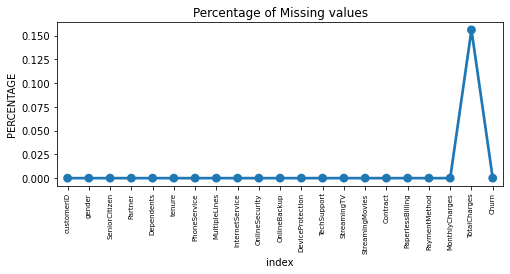

In [24]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(8,3))
ax = sns.pointplot(x='index', y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [4]:
df.TotalCharges.dropna(how='any',axis=0,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Text(0, 0.5, 'Frequency')

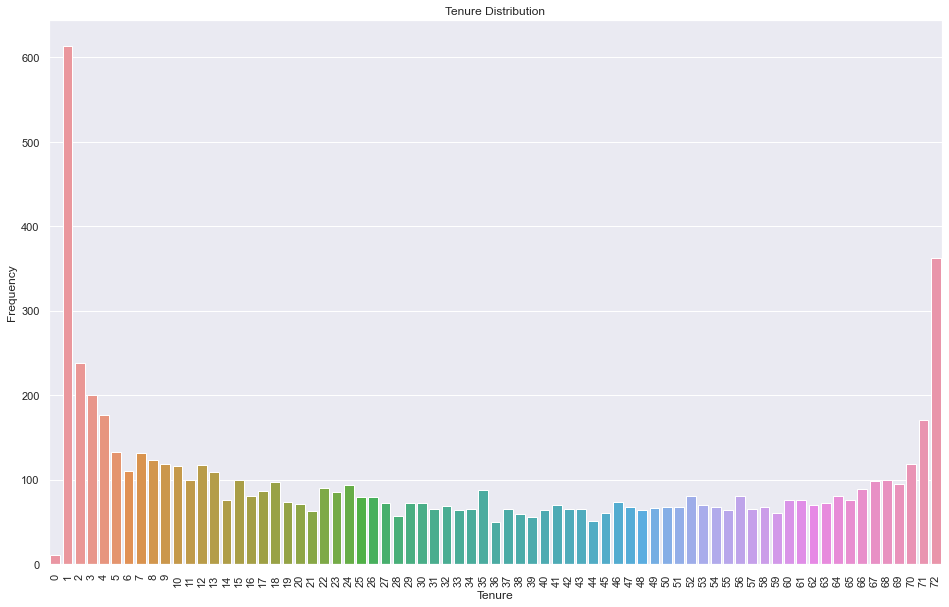

In [54]:

plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(16,10)})
sns.countplot(data=df,x='tenure')

plt.title("Tenure Distribution")
plt.xlabel("Tenure")
plt.ylabel("Frequency")


In [40]:
df.tenure.max()

72

In [5]:
labels = ["{0} - {1}".format(i, i+11) for i in range(1,72,12)]
df['tenure_group'] = pd.cut(df.tenure, range(1,80,12), right=False, labels = labels)

In [11]:
df.tenure_group

0        1 - 12
1       25 - 36
2        1 - 12
3       37 - 48
4        1 - 12
         ...   
7038    13 - 24
7039    61 - 72
7040     1 - 12
7041     1 - 12
7042    61 - 72
Name: tenure_group, Length: 7043, dtype: category
Categories (6, object): ['1 - 12' < '13 - 24' < '25 - 36' < '37 - 48' < '49 - 60' < '61 - 72']

In [49]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group'],
      dtype='object')

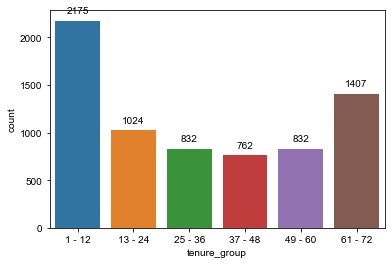

In [8]:
ax=sns.countplot(data=df, x='tenure_group')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.set(rc={'figure.figsize':(16,10)})

In [6]:
df.drop(['customerID','tenure'],axis=1,inplace=True)

In [7]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

# Data Exploration
Univariate Analysis for Categorical Data

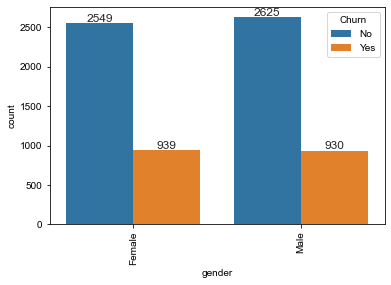

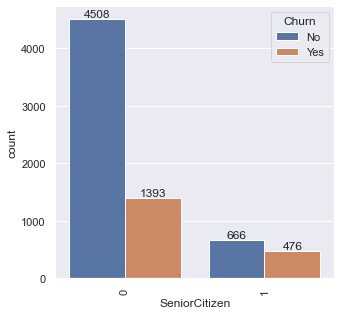

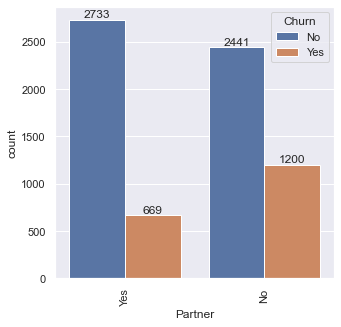

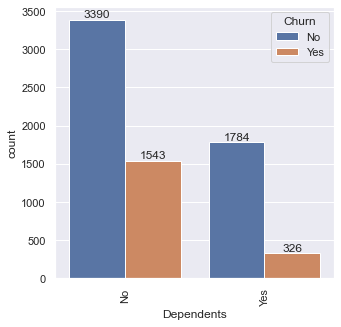

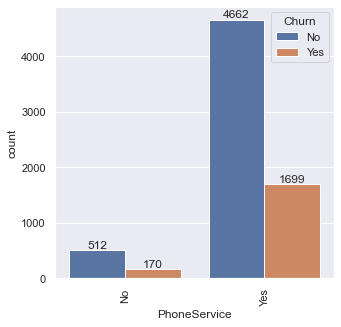

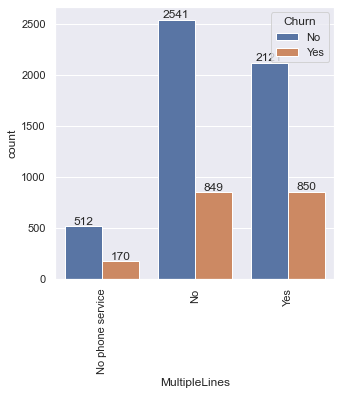

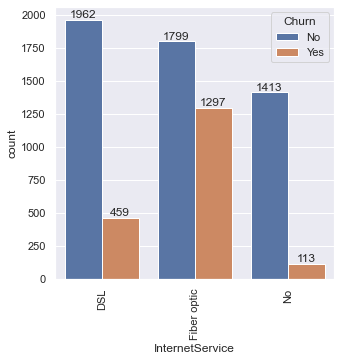

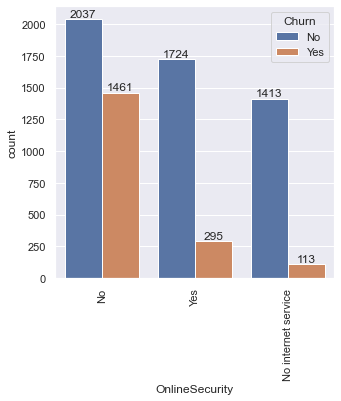

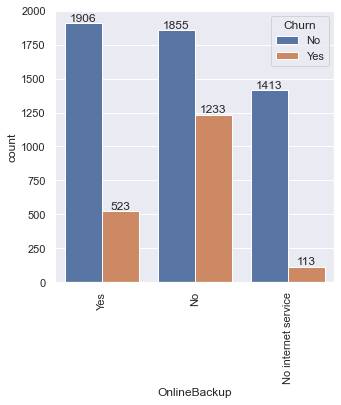

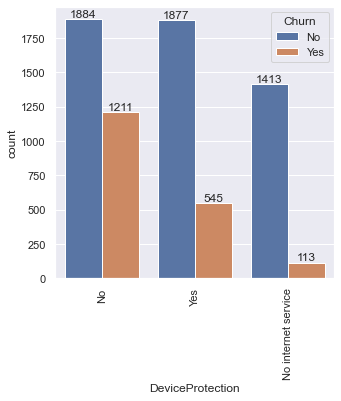

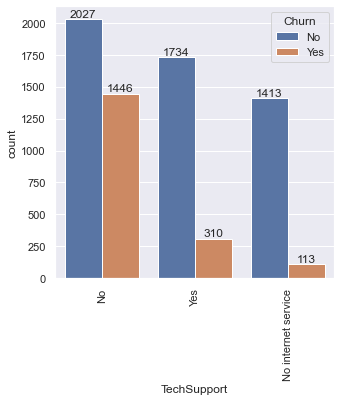

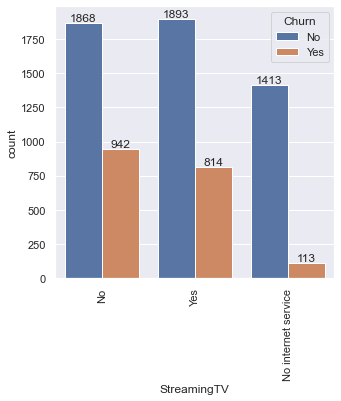

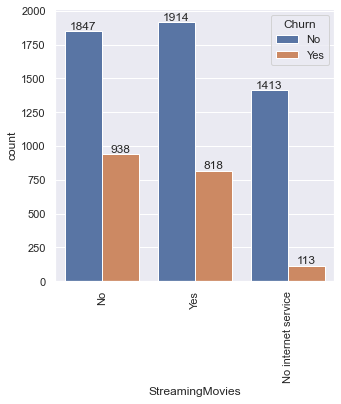

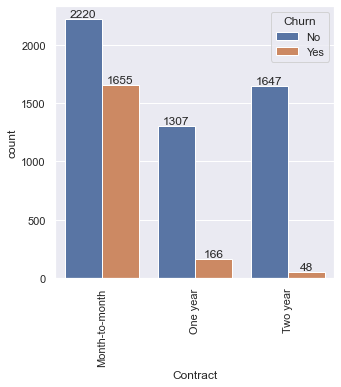

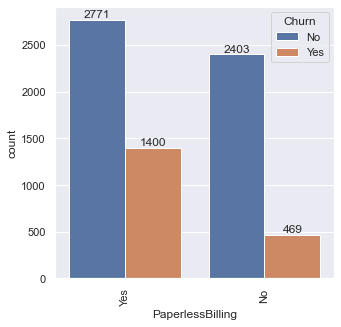

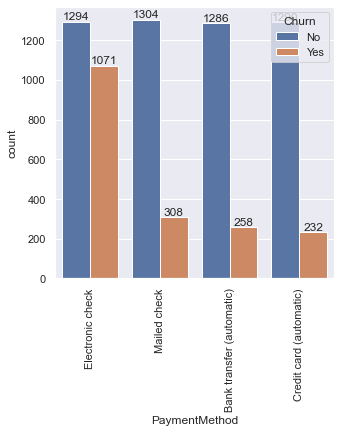

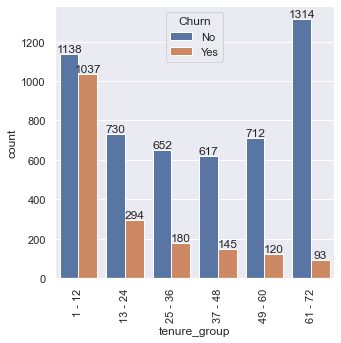

In [14]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'MonthlyCharges', 'TotalCharges'])):
  plt.figure(i)
  sns.countplot(data=df, x=predictor, hue='Churn') 
  sns.set(rc={'figure.figsize':(5,5)})
  # Add labels to the bars
  ax = plt.gca()
  for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
  plt.xticks(rotation=90)

Overall Churn rate is calculated as 26.5%
From the above graphs, we infer that
* Senior citizens are more churners, non senior citizens churn rate is 23.6% whereas Senior citizens churn rate is around 33.7%
* Customers with no partners are more churners than with partners,as non partners churn rate is 32.9% 
  whereas churn rate of customers with partners is 20%
* Non dependent customers are high churners than dependent as they have churn rate of 31.27%, whereas the chrun 
  rate of dependent is 18.27%
* The cutomers with phone service has a churn rate of 26.7% whereas those without phone service is 24.9%, as these percentages 
  are lesser or closer to overall churn rate, we will not consider this factor in analysis.
* The customer with multiple lines are high churners with a rate of 28.6% compared to customers without multiple lines 
  whose churn rate is 25.04%
* The customers with Fiber optics Internet connections are high churners with the rate of 41.89%, much higher than the 
  customers with DSL connections with the rate of 18.95%
* The custoemrs without Online security are high churners with the churning rate of 41.76% whereas those with online security 
  lesser, equivalent to 14.61%
* The customers without online backup are high churners with the rate of 39.92% wheras those with online backup facilities 
  rate to 21.53%
* Those without the device protection are high churners with the churing rate of 39.12% wheras those with device protection 
  has a churning rate of 10.05%
* The customers without the tech support of the company are high churners with 41.63% whereas those with technical support
  lay on the rate of 15.16%
* Though there is no major difference between those with streaming TV options and those without Streaming TV options,
  the latter has higher percentage of 33.52% whereas the customers with streaming TV options lie on 30.07% churn rate.
* The customers without streaming movies options are the high churner with the churning rate of 33.68% whereas those with 
  streaming movies has churning rate of 29.94%
* The customers with Monthly plan are high churners with churn rate of 42.7% followed by customers with one year plan with 
  the churn rate of 11.2% and very low churners are those with two year plan with a churn rate of 2.8% only.
* The customers with paperless billing are high churners with the churn rate of 33.56% compared to those without paperless
  billing of 24,25% churn rate.
* The customers with Electronic payment method are very high churners comparatively with the churn rate of 45.68% whereas 
  all the other three payment methods lies more or less in 15% -20% range; churn rate of mailed check payment is 19.10%, 
  churn rate of bank transfer mode of payment is 16.92% and those with credit card payment option lie on 15.34%.
* The customers with the tenure range of 1-12 months are high churners with the churning rate of 47.67% followed by 13-24
  months with the churn rate of 28.71%, others lies below the overall churn rate of 26.5%

# Bivariate Analysis of Categorical data


In [8]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

In [9]:
df_Active = df.loc[df.Churn==0]

In [10]:
df_Churned = df.loc[df.Churn==1]


In [11]:
len(df_Churned)

1869

In [12]:
len(df_Active)

5174

In [14]:
def uniplot(df,col,title,hue):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    #temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    #width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    #fig.set_size_inches(width , 8)
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')
    sns.set(rc={'figure.figsize':(7,7)})
    for p in ax.patches:
       ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    plt.xticks(rotation=90)
    plt.show()

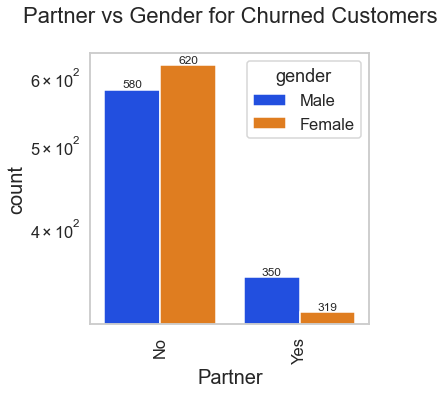

In [21]:
uniplot(df_Churned,col='Partner',title='Partner vs Gender for Churned Customers', hue='gender')

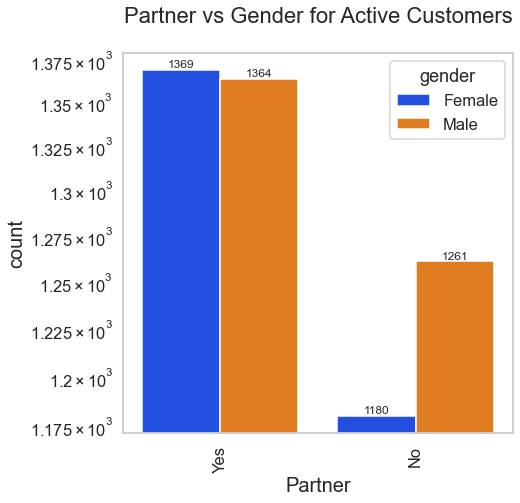

In [22]:
uniplot(df_Active,col='Partner',title='Partner vs Gender for Active Customers', hue='gender')

From the above graph, we infer that the women customers without partners are high churners with the churn rate of 34.4% followed by Male customers without partners with the rate of 31.5%

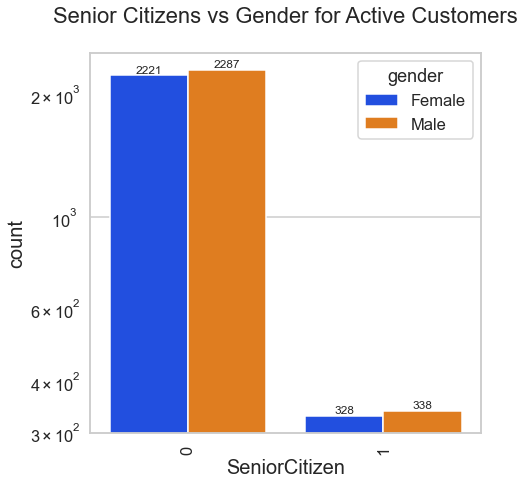

In [23]:
uniplot(df_Active,col='SeniorCitizen',title='Senior Citizens vs Gender for Active Customers', hue='gender')

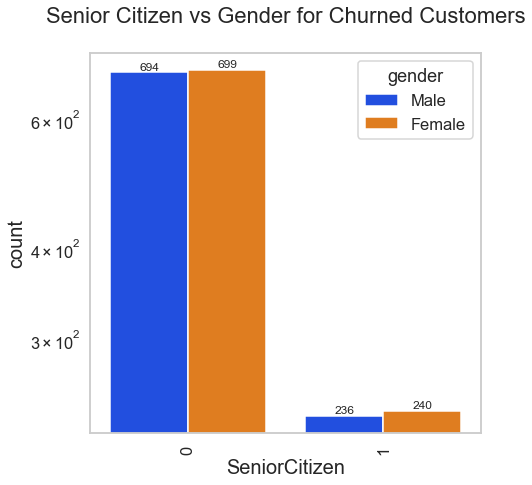

In [24]:
uniplot(df_Churned,col='SeniorCitizen',title='Senior Citizen vs Gender for Churned Customers', hue='gender')

The above graph indicates that both the senior and non-senior female customers are high churner with the former's churn rate of 42.8% and the latter follows them with 31.4% The Male senior citizens do have high churn rate of 41.1% compared to non-senior citizen male with the churn rate of 23.28%, which is leasser than the overall churn rate.

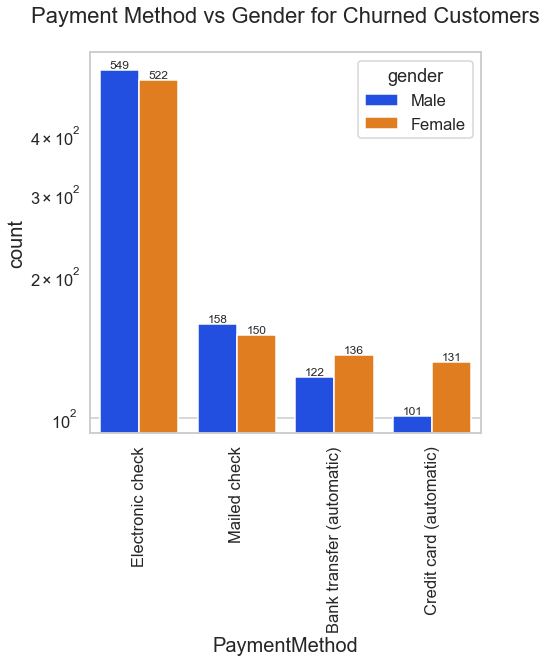

In [25]:
uniplot(df_Churned,col='PaymentMethod',title='Payment Method vs Gender for Churned Customers', hue='gender')

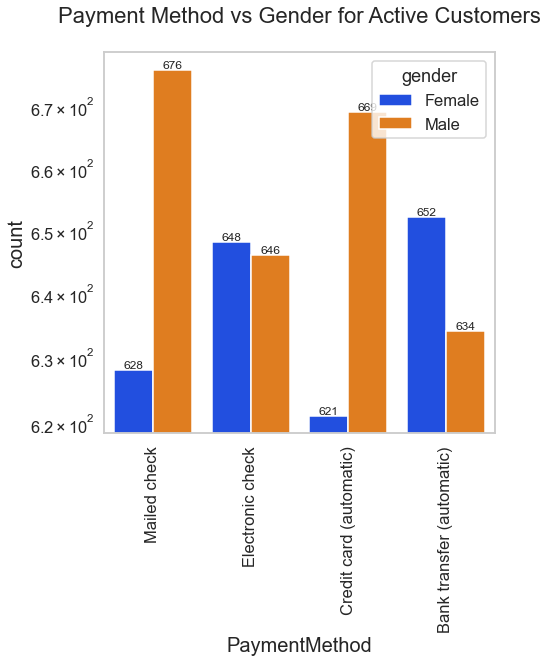

In [26]:
uniplot(df_Active,col='PaymentMethod',title='Payment Method vs Gender for Active Customers', hue='gender')

The above graph indicates that the Male customers with Electronic check payment method are high churners with churn rate of 45.94% whereas female customers with electronic check mode of payment is 44.61%. All other payment method customers are below the overall churn rate of 26.5% 

In [27]:
df.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

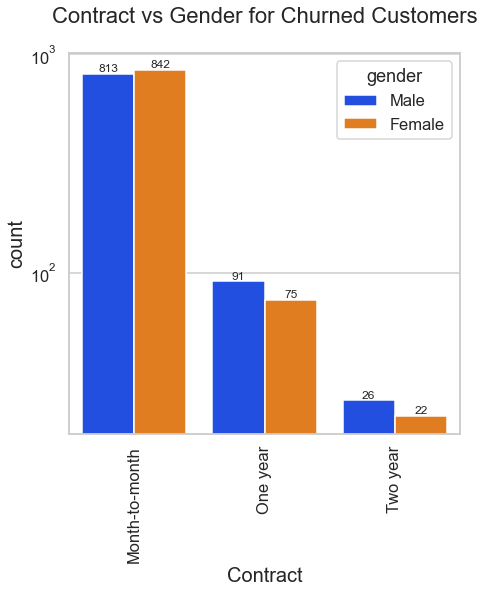

In [17]:
uniplot(df_Churned,col='Contract',title='Contract vs Gender for Churned Customers', hue='gender')

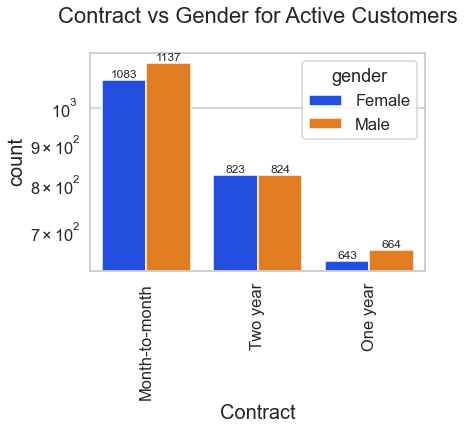

In [15]:
uniplot(df_Active,col='Contract',title='Contract vs Gender for Active Customers', hue='gender')

From the above graph, we infer that the high churners are the female customers with Month to Month contract type with the churn rate of 43.74% and Male customers with the same plan has the churn rate as 41.69%. Whereas the other contract type has the churn rate much lessesr than the overall churn rate of 26.5%.

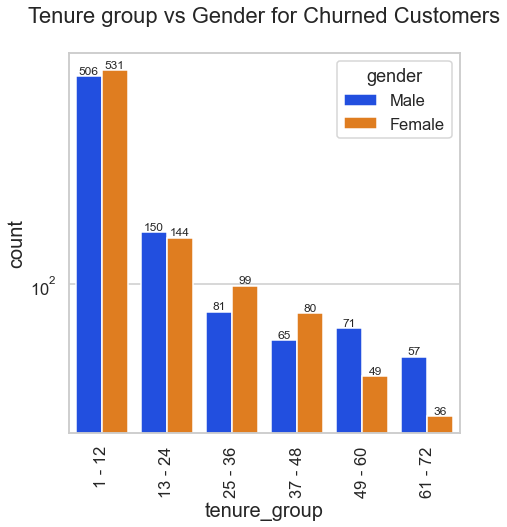

In [18]:
uniplot(df_Churned,col='tenure_group',title='Tenure group vs Gender for Churned Customers', hue='gender')

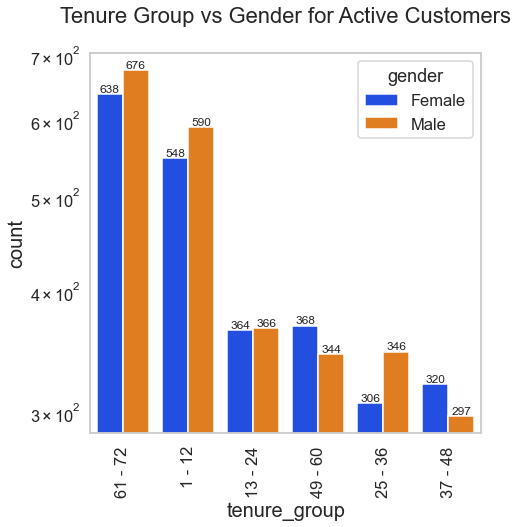

In [19]:
uniplot(df_Active,col='tenure_group',title='Tenure Group vs Gender for Active Customers', hue='gender')

From above graph we understand that the high churners are in the tenure range from 1 to 24 months with highest churning rate be female cutomers of 1-12 range as 49.21% followed by male customer in the same tenure group as 46.16%. The Male customers in the tenure range of 13-24 has highest churn rate of 29.06% compared to the female customers of the same tenure group as 28.34%. The female customers in the tenure group of 25-36 has higher churn rate of 24.44% compared to male customers of the same group as 18.96%. Whereas all the other tenure group customers has a churn rate closer or lesser than overall customer churn rate of 26.5%

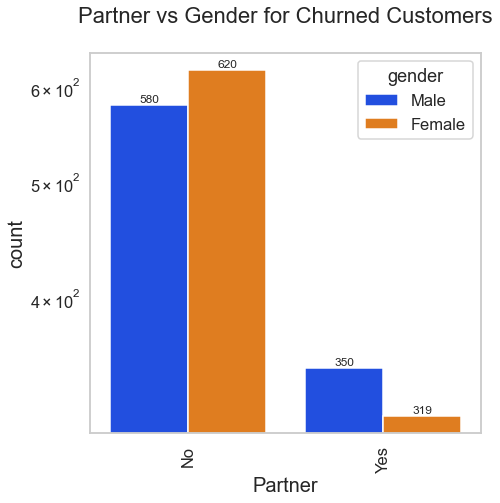

In [21]:
uniplot(df_Churned,col='Partner',title='Partner vs Gender for Churned Customers', hue='gender')

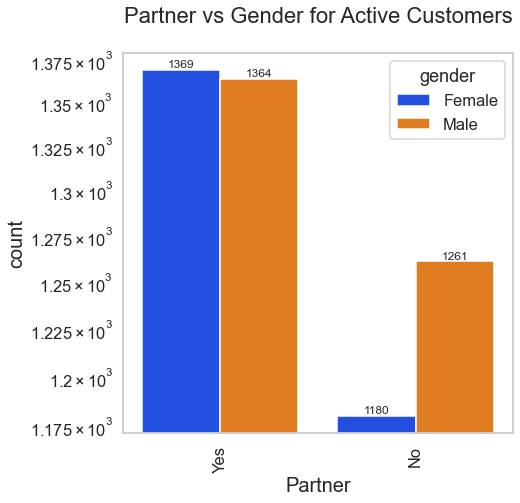

In [23]:
uniplot(df_Active,col='Partner',title='Partner vs Gender for Active Customers', hue='gender')

From the above graph, we see that the female customers without partners has higher churn rate of 34.44% followed by the Male customers without partners with the rate of 31.50%, whereas the customers with partners have lesser churn rate compared to the overall churn rate of 26.5%

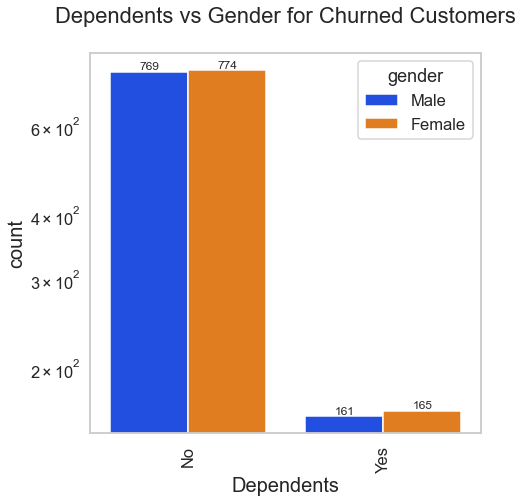

In [24]:
uniplot(df_Churned,col='Dependents',title='Dependents vs Gender for Churned Customers', hue='gender')

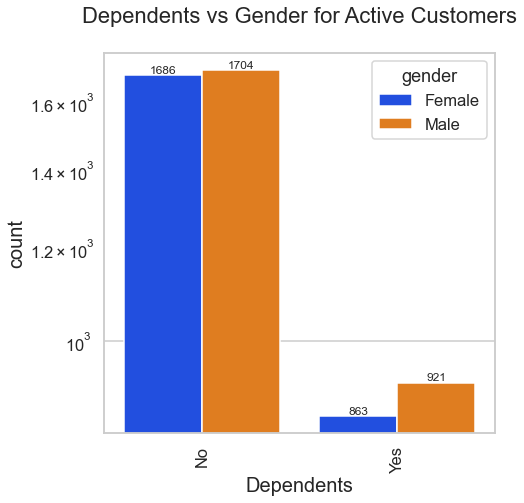

In [25]:
uniplot(df_Active,col='Dependents',title='Dependents vs Gender for Active Customers', hue='gender')

From the above graph, we see that the customers without dependents are high churners with the churn rate of 31.46% for female customers and 31.09% for Male customers.

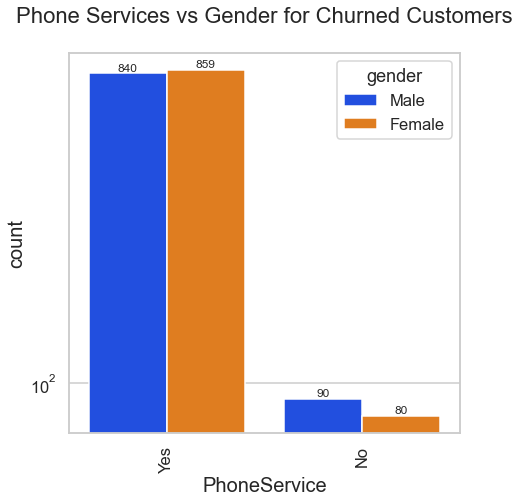

In [28]:
uniplot(df_Churned,col='PhoneService',title='Phone Services vs Gender for Churned Customers', hue='gender')

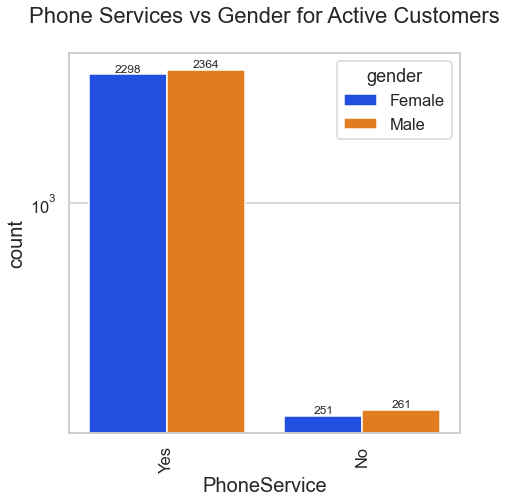

In [27]:
uniplot(df_Active,col='PhoneService',title='Phone Services vs Gender for Active Customers', hue='gender')

The graph shows that the Female customers with Phone services has a churn rate of 27.20% folowed by male custoemrs with Phone services with the churn rate of 26.21%, much closer to the overall churn rate. Similarly the customers without phone services has a churn rate much closer to the overall churn rate with Female customers of this category as 24.16% and Male customers with the churn rate of 25.64%

In [29]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

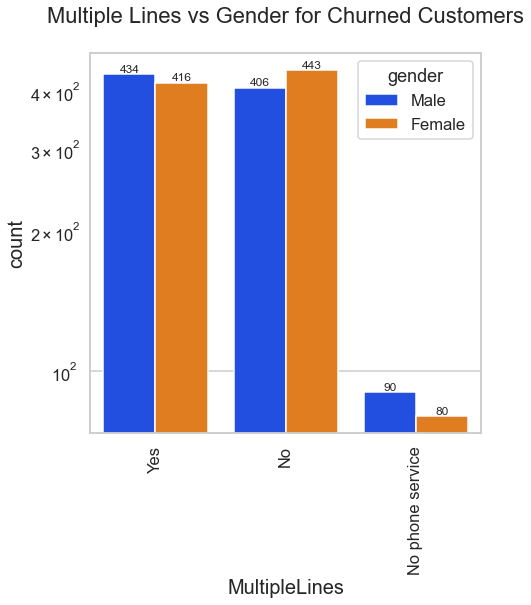

In [30]:
uniplot(df_Churned,col='MultipleLines',title='Multiple Lines vs Gender for Churned Customers', hue='gender')

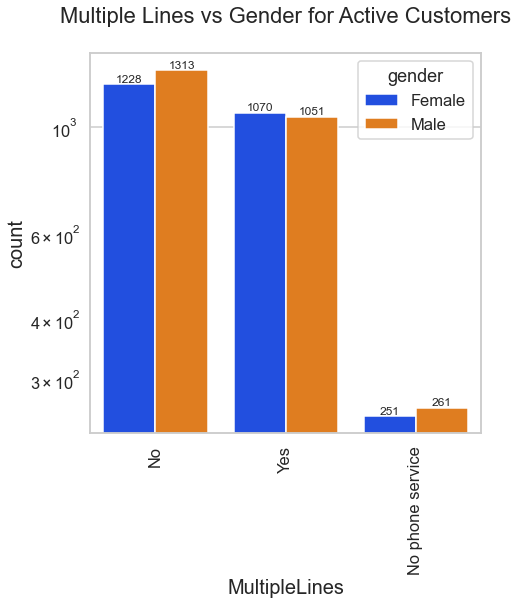

In [31]:
uniplot(df_Active,col='MultipleLines',title='Multiple Lines vs Gender for Active Customers', hue='gender')

From the graph, we see that the Male customers with Multiple lines are hig churners with the churn rate of 29.22% followed by female customers with multiple lines with the churn rate of 27.99%. Similarly the female customers without multiple lines have the churn rate of 26.51% followed by Male customers with multiple lines as 23.61%

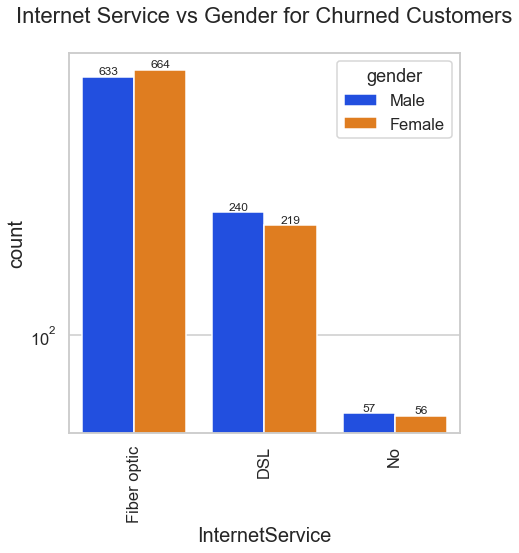

In [32]:
uniplot(df_Churned,col='InternetService',title='Internet Service vs Gender for Churned Customers', hue='gender')

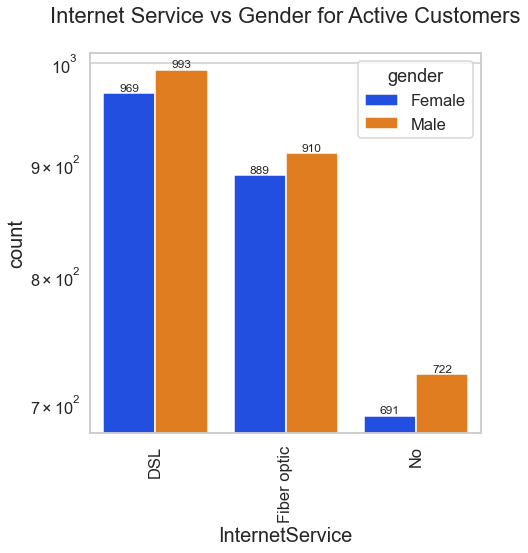

In [33]:
uniplot(df_Active,col='InternetService',title='Internet Service vs Gender for Active Customers', hue='gender')

From the graph, we see that the Female customers with fiber optic internet service has high rate of 42.75% followed by Male customer with Fiber optic internet service as 41.02%.Whereas the customers with DSL and no internet services has churn rate lesser than the overall churn rate of 26.5%

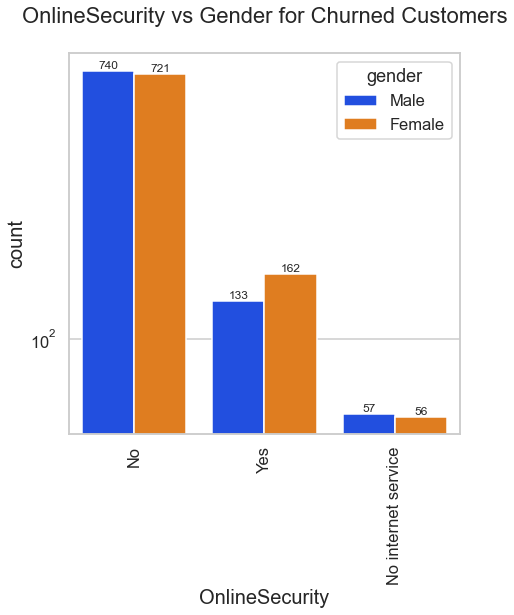

In [34]:
uniplot(df_Churned,col='OnlineSecurity',title='OnlineSecurity vs Gender for Churned Customers', hue='gender')

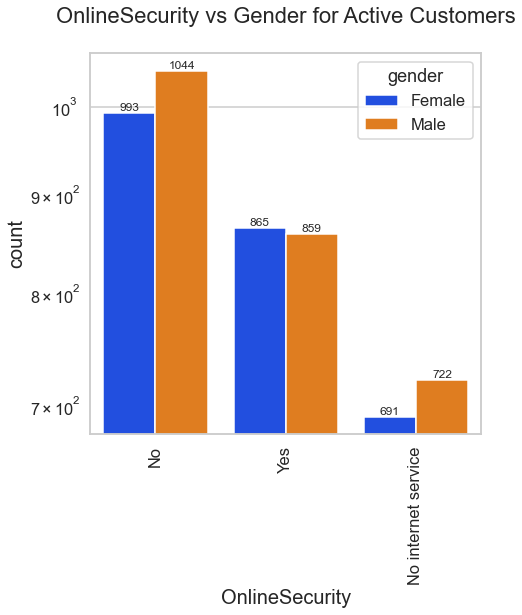

In [35]:
uniplot(df_Active,col='OnlineSecurity',title='OnlineSecurity vs Gender for Active Customers', hue='gender')

The female customers without online security are high churners with the rate of 42.06% and the male without the service are also high churners with 41.47%, whereas the customers with the online security are low churners wit the rate much lesser than the overall churn rate of 26.5%

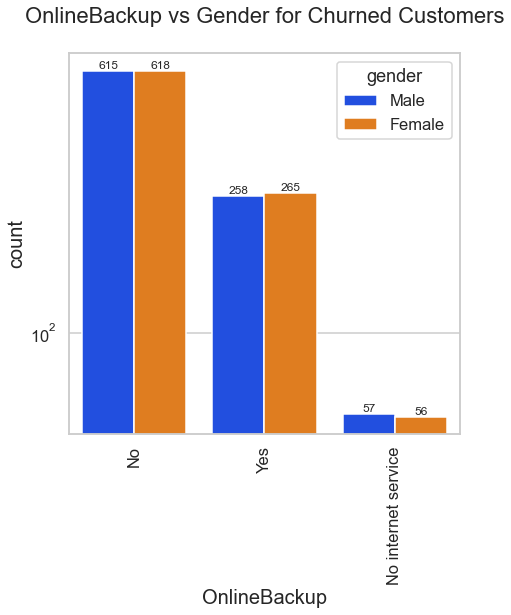

In [36]:
uniplot(df_Churned,col='OnlineBackup',title='OnlineBackup vs Gender for Churned Customers', hue='gender')

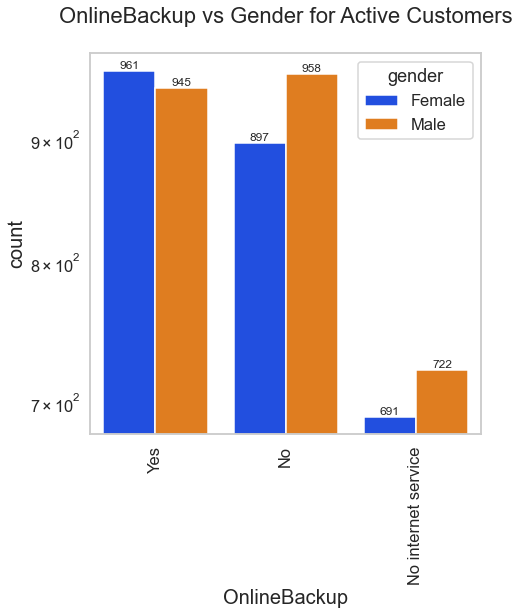

In [37]:
uniplot(df_Active,col='OnlineBackup',title='OnlineBackup vs Gender for Active Customers', hue='gender')

The female customers without Online backup services are high churners withthe churn rate of 40.79% followed by Male customer without online services with the rate of 38.85%, whereas the other customers with the online backup services has lesser churn rate compared to the overall churn rate of 26.5%

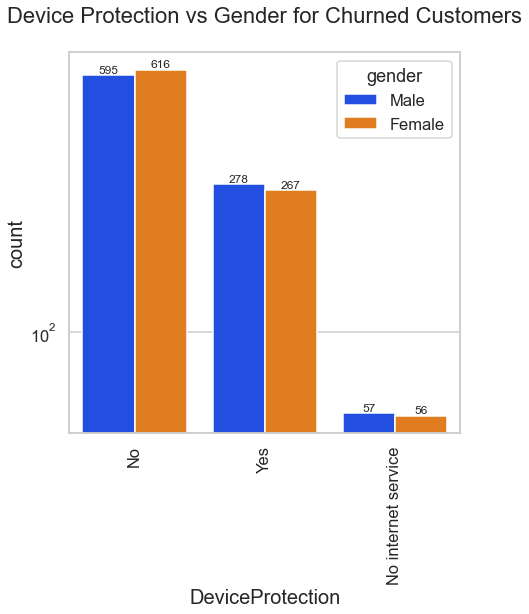

In [38]:
uniplot(df_Churned,col='DeviceProtection',title='Device Protection vs Gender for Churned Customers', hue='gender')

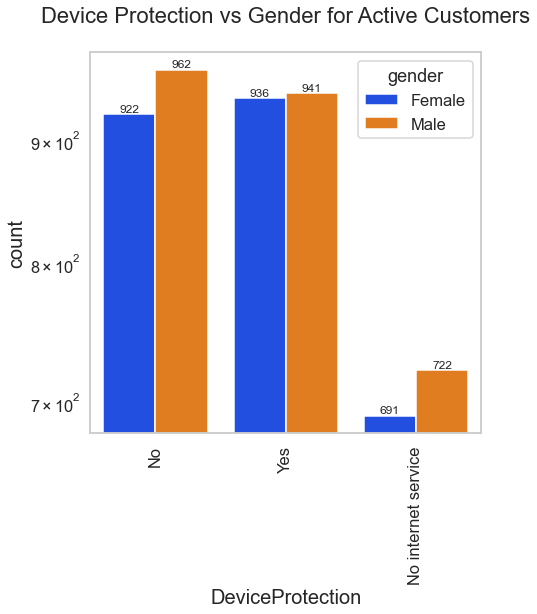

In [39]:
uniplot(df_Active,col='DeviceProtection',title='Device Protection vs Gender for Active Customers', hue='gender')

The Female customers without device protection plan are high churner with the chur rate of 40.05% followed by Male customers again without device protection with the churn rate of 38.21%, whereas the customers with device protection has churn rate lesser than the overall churn rat eof 26.5%

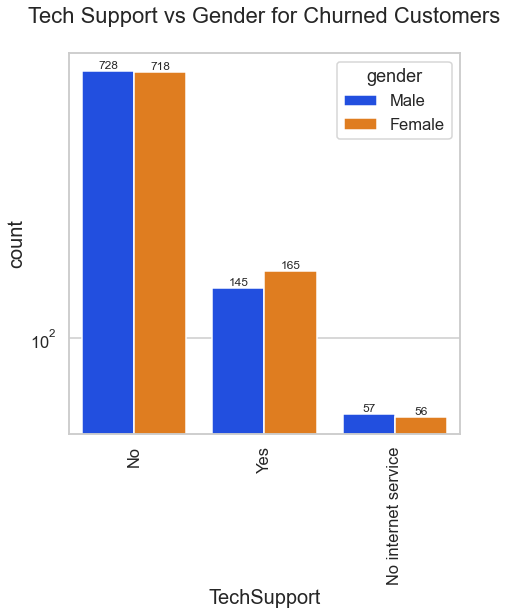

In [40]:
uniplot(df_Churned,col='TechSupport',title='Tech Support vs Gender for Churned Customers', hue='gender')

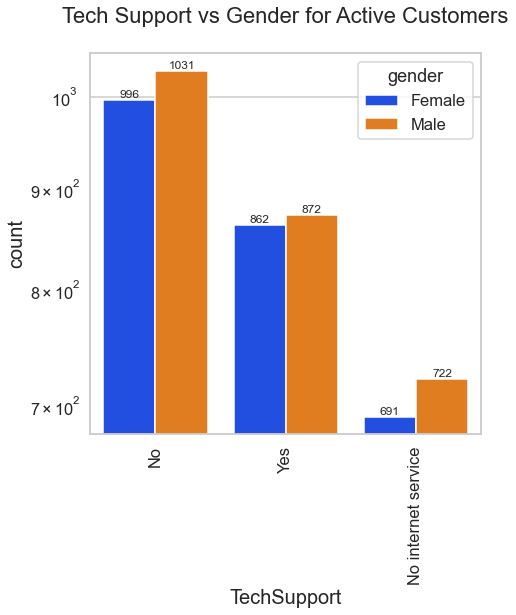

In [41]:
uniplot(df_Active,col='TechSupport',title='Tech Support vs Gender for Active Customers', hue='gender')

The customers without technical support are the high churners with churn rate of 41.89% for female customers and 41.38% for male customers, whereas the customers with technical support are less churners with their churn rate lesser than the overall churn rate 26.5%

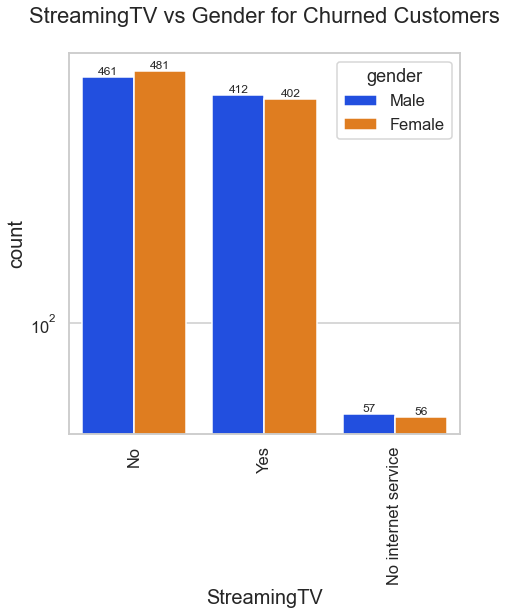

In [42]:
uniplot(df_Churned,col='StreamingTV',title='StreamingTV vs Gender for Churned Customers', hue='gender')

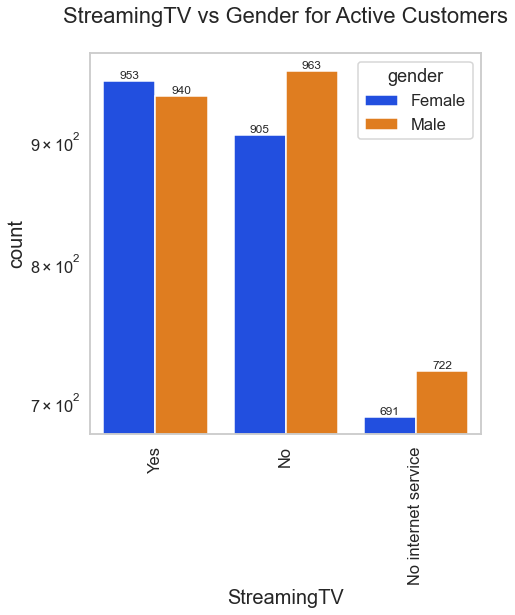

In [43]:
uniplot(df_Active,col='StreamingTV',title='StreamingTV vs Gender for Active Customers', hue='gender')

All the customers with or without streaming options are high churners with their churn rate higher than the overall churn rate of 26.5%. Male customers with the option is 30.47% whereas Female customers have churn rate of 29.45%, Male custoemrs without the streaming TV option is with the churn rate of 32.37% and Female customers without streaming TV option has a churn rate of 34.70%

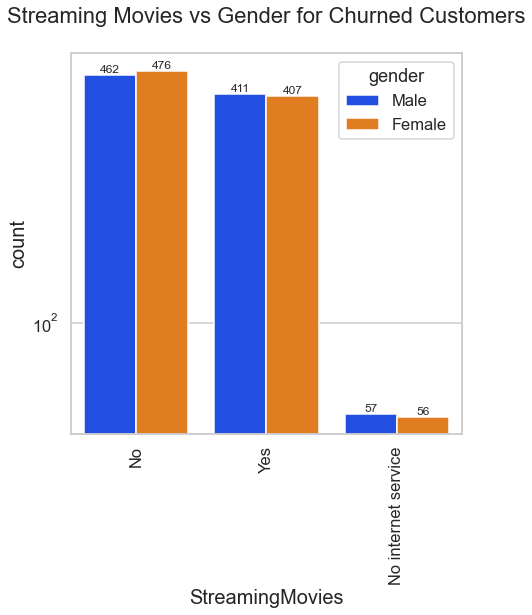

In [44]:
uniplot(df_Churned,col='StreamingMovies',title='Streaming Movies vs Gender for Churned Customers', hue='gender')

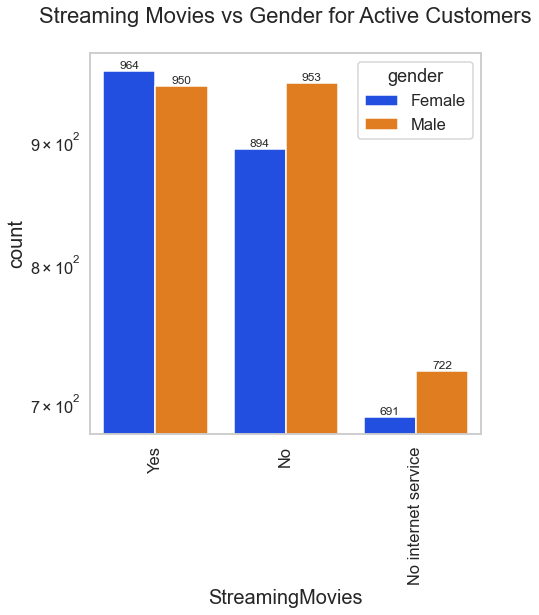

In [45]:
uniplot(df_Active,col='StreamingMovies',title='Streaming Movies vs Gender for Active Customers', hue='gender')

All customers with or without streaming movies plan are high churners with the churn rate more than the overall churn rate of 26.5%

In [46]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

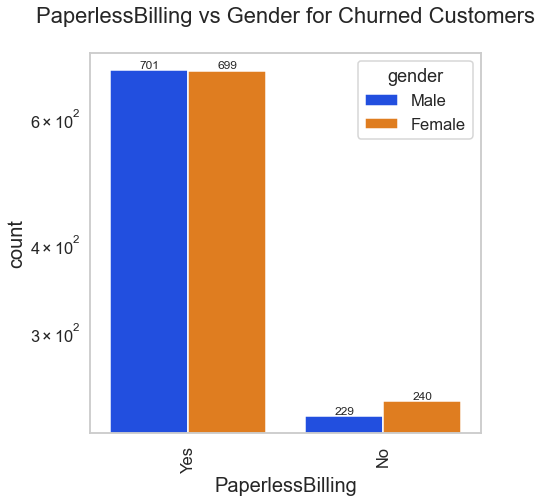

In [47]:
uniplot(df_Churned,col='PaperlessBilling',title='PaperlessBilling vs Gender for Churned Customers', hue='gender')

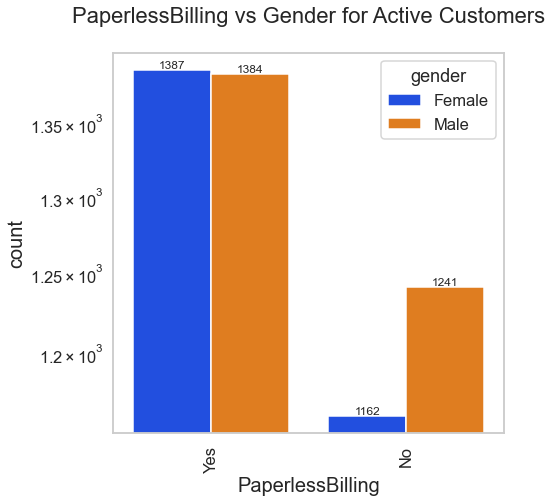

In [48]:
uniplot(df_Active,col='PaperlessBilling',title='PaperlessBilling vs Gender for Active Customers', hue='gender')

The customers with paperless billing are high churners with the churn rate of 33.5 for female customers and 33.6% for Male customers.

In [49]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

# Numerical Analysis

In [50]:
df_dummies = pd.get_dummies(df)

df_dummies.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


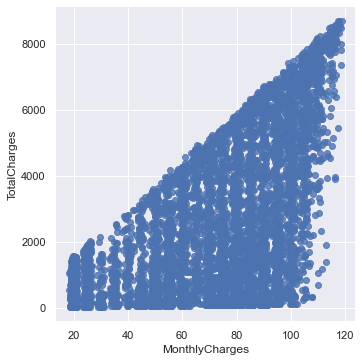

In [52]:
sns.lmplot(data=df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

The graph shows that as the monthly charges increases then the total charges also increases.

Text(0.5, 1.0, 'Monthly charges by churn')

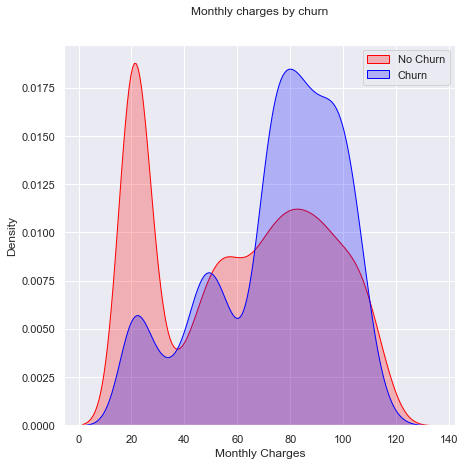

In [54]:
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

The graph infers that the high churners are those with high monthly charges in the range of $60 to $120

Text(0.5, 1.0, 'Total charges by churn')

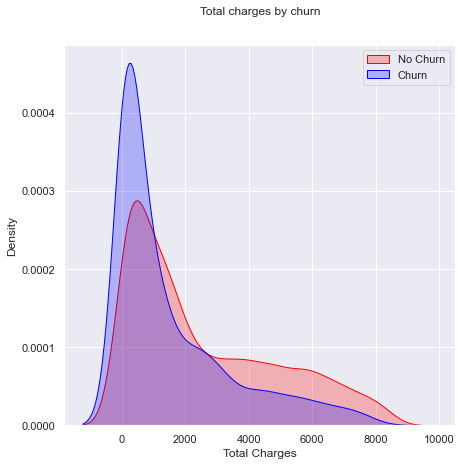

In [55]:
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

The high churners seems to be the customers whose total charge is in the range of 0 to 2000; Maybe they are the ones who churns in a short period of time, so their total charges are less.

<AxesSubplot:>

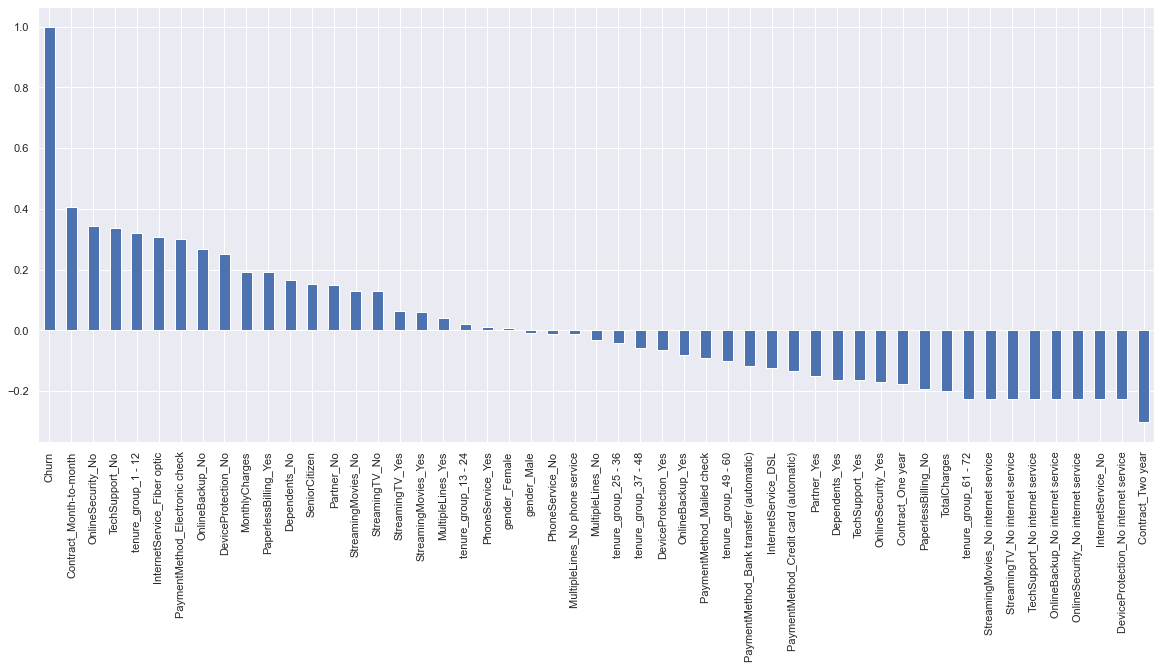

In [57]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

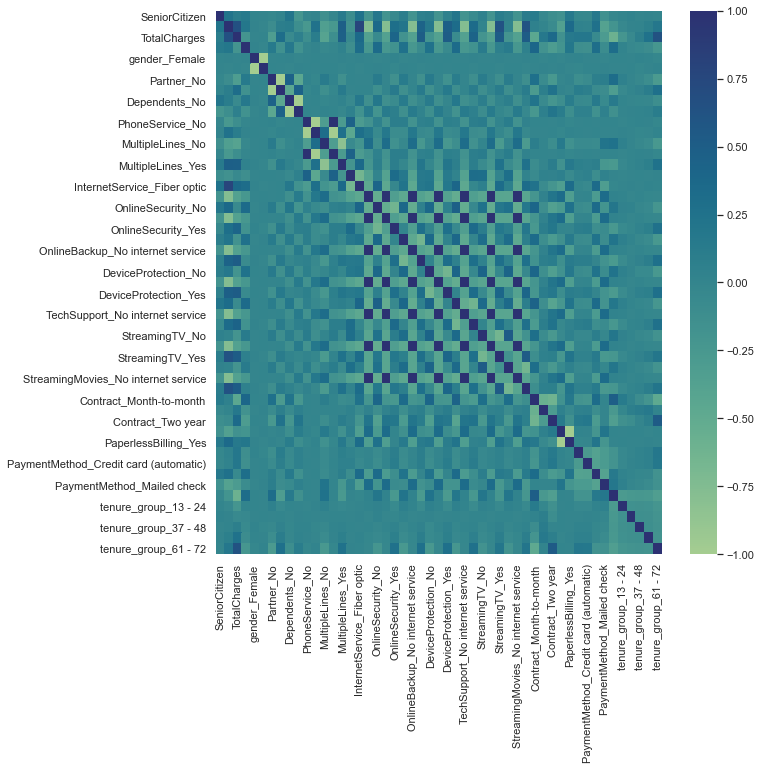

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(df_dummies.corr(), cmap='crest')

Conclusion:
   The following analysis is based on the overall churn rate of the customers that rates to 26.5%
   1. The senior citizens and female non-senior citizens who are without partners and non-depedents are high churners
   2. Customers without device protection, Online security, online backup,tech support,multiple lines together with female 
      customers with multiple lines and phone services are high churner
   3. Customers with fiber optics Internet services, streaming movies plan and with or without streaming TV options are high           churners
   4.  Customers who belongs to the tenure group of 1-24,with Month to Month contract type, Electronic check payment  and              paperless billing are the high churners
   5. The high churners are those with high monthly charges in the range of  60 𝑡𝑜 120
   6. The high churners seems to be the customers whose total charge is in the range of 0 to 2000; Maybe they are the ones who         churns in a short period of time, so their total charges are less.
   

